In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy

import matplotlib.pyplot as plt



In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
#fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train,_), (X_test,_) = fashion_mnist.load_data()

In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
input_dim = 784
hidden_dim = 64
code_dim = 32
batch_size = 128
epochs = 50

In [ ]:
# Encoder architecture
input_img = Input(shape=(input_dim,))
encoded = Dense(hidden_dim, activation='relu')(input_img)
code = Dense(code_dim, activation='relu')(encoded)

In [ ]:
# Decoder architecture
decoder_hidden = Dense(hidden_dim, activation='relu')(code)
output_img = Dense(input_dim, activation='sigmoid')(decoder_hidden)

In [ ]:
# Auotoencoder definition
autoencoder = Model(input_img, output_img)

In [ ]:
# Compile the autoencoder

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
X_train = X_train.reshape((-1, input_dim))
X_test = X_test.reshape((-1, input_dim))

In [ ]:
# fit the model
autoencoder.fit(X_train, X_train, epochs= epochs, batch_size=batch_size,validation_data=(X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.4253 - val_loss: 0.3102
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3046 - val_loss: 0.2995
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2965 - val_loss: 0.2947
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2921 - val_loss: 0.2921
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2897 - val_loss: 0.2898
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2880 - val_loss: 0.2889
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2863 - val_loss: 0.2870
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2847 - val_loss: 0.2858
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2834 - val_loss: 0.2853
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.2820 - val_loss: 0.2842
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.2821 - val_loss: 0.2835
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms

In [ ]:
# Predictions

decoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


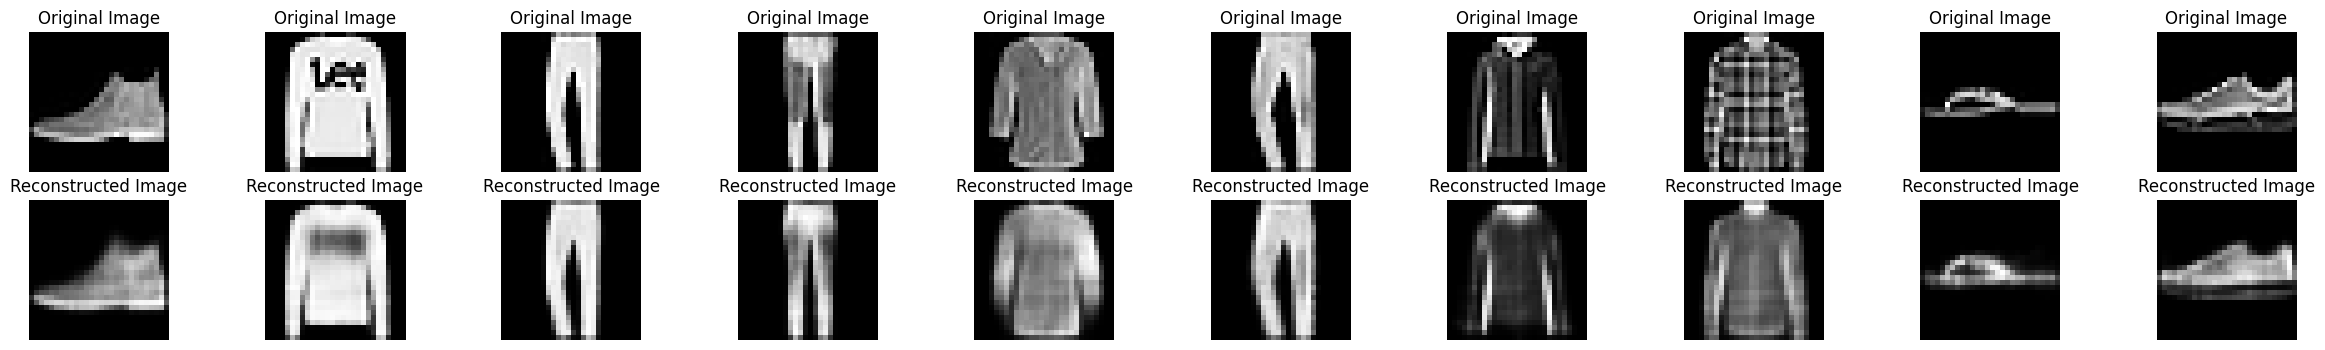

In [ ]:
# Visualizing the images

n=10
plt.figure(figsize=(30,4))

for i in range(n):
  # original images
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28),cmap = 'gray')
  plt.title('Original Image')
  plt.axis('off')

  # reconstructed images
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28),cmap = 'gray')
  plt.title('Reconstructed Image')
  plt.axis('off')



AUTOENCODER - Eg 2


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/butterfly.jpg')

In [ ]:
img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

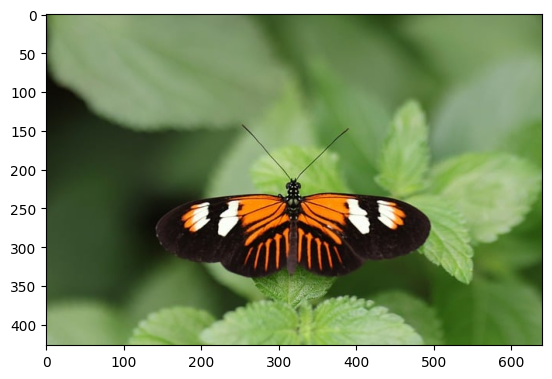

In [ ]:
plt.imshow(img_color)

In [ ]:
img_color.shape

(427, 640, 3)

In [ ]:
height,width,channel = img_color.shape

In [ ]:
height

427

In [ ]:
# Reshaping the image
img_array = img_color.reshape(( 1, height * width * channel)).astype('float32')/255.0

In [ ]:
img_array

array([[0.28627452, 0.39607844, 0.16470589, ..., 0.42352942, 0.58431375,
        0.31764707]], dtype=float32)

In [59]:
input_dim = height * width * channel
hidden_dim = 64
code_dim = 32
batch_size = 1
epochs = 100

In [60]:
# Encoder architecture

input_img = Input(shape=(input_dim,))
encoded = Dense(hidden_dim, activation='relu')
encoded_output = encoded(input_img)
code = Dense(code_dim, activation='relu')
code_output = code(encoded_output)



In [61]:
# Decoder
decoder_hidden = Dense(hidden_dim, activation='relu')
decoder_output = decoder_hidden(code_output)
output_img = Dense(input_dim, activation='sigmoid')
output_img = output_img(decoder_output)

In [62]:
autoencoder = Model(input_img, output_img)

In [63]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [64]:
autoencoder.fit(img_array, img_array, epochs= epochs, batch_size=batch_size)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.6931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6930
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6807
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6097
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6074
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5847
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6075
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5942
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5948
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.5785
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5751
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5747
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5778
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5753
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5747
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step 

In [65]:
# Predictions

decoded_predictions = autoencoder.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [67]:
decoded_img_reshaped = decoded_predictions.reshape(height,width,channel)

(-0.5, 639.5, 426.5, -0.5)

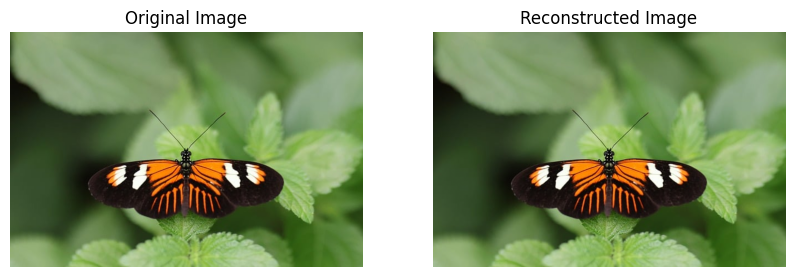

In [68]:
# Visualizing the images


plt.figure(figsize=(10,10))

# Original image

ax = plt.subplot(1,2,1)
plt.imshow(img_color)
plt.title('Original Image')
plt.axis('off')

# Reconstructed image

ax = plt.subplot(1,2,2)
plt.imshow(decoded_img_reshaped)
plt.title('Reconstructed Image')
plt.axis('off')



